In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
DATASET_PATH = "fashion_dataset/"

In [4]:
df = pd.read_csv(DATASET_PATH + "styles.csv", error_bad_lines=False)
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
df.head(5)

/home/ewaisha/anaconda3/envs/fashion/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipp

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg


In [5]:
print("Number of data points:", len(df))

Number of data points: 44424


In [6]:
## Remove entries that do not have a corresponding image in the images directory
count = 0
for index, row in tqdm(df.iterrows()):
    if not os.path.exists(os.path.join(DATASET_PATH, "images", row['image'])):
        count+=1
        df.drop(df.loc[df['id']==row['id']].index, inplace=True)

print("Number of data points after filteration:", len(df))

44424it [00:02, 17602.62it/s]

Number of data points after filteration: 44419


In [14]:
print(f"masterCategory:\n {df['masterCategory'].unique()}\n")
print(f"subCategory:\n {df['subCategory'].unique()}\n")
print(f"articleType:\n {df['articleType'].unique()}")

masterCategory:
 ['Apparel' 'Accessories' 'Footwear' 'Personal Care' 'Free Items'
 'Sporting Goods' 'Home']

subCategory:
 ['Topwear' 'Bottomwear' 'Watches' 'Socks' 'Shoes' 'Belts' 'Flip Flops'
 'Bags' 'Innerwear' 'Sandal' 'Shoe Accessories' 'Fragrance' 'Jewellery'
 'Lips' 'Saree' 'Eyewear' 'Nails' 'Scarves' 'Dress'
 'Loungewear and Nightwear' 'Wallets' 'Apparel Set' 'Headwear' 'Mufflers'
 'Skin Care' 'Makeup' 'Free Gifts' 'Ties' 'Accessories' 'Skin'
 'Beauty Accessories' 'Water Bottle' 'Eyes' 'Bath and Body' 'Gloves'
 'Sports Accessories' 'Cufflinks' 'Sports Equipment' 'Stoles' 'Hair'
 'Perfumes' 'Home Furnishing' 'Umbrellas' 'Wristbands' 'Vouchers']

articleType:
 ['Shirts' 'Jeans' 'Watches' 'Track Pants' 'Tshirts' 'Socks' 'Casual Shoes'
 'Belts' 'Flip Flops' 'Handbags' 'Tops' 'Bra' 'Sandals' 'Shoe Accessories'
 'Sweatshirts' 'Deodorant' 'Formal Shoes' 'Bracelet' 'Lipstick' 'Flats'
 'Kurtas' 'Waistcoat' 'Sports Shoes' 'Shorts' 'Briefs' 'Sarees'
 'Perfume and Body Mist' 'Heels' 'Sungl

#### The masterCategory column contains very broad classes for clothing items. The articleType on the other hand contains lots of information that may not be necessary (depending on the task). We'll classify images based on the subCategory column as it is balanced between the two. Later we can use articleType for more fine-grained predictions.

## Remove entries with labels that occur less than 200 times in the dataset

#### Upon inspecting the dataset, aside from the class imbalance there are some incorrect labels. I limit the data to those with labels occuring more than 200 times just to be safe.
#### In terms of imbalance, this can be dealt with using known approaches like augmenting the under-represented classes, or ssampling from the dominant classes, or weighting the loss function for each sample depending on its frequency of occurance.

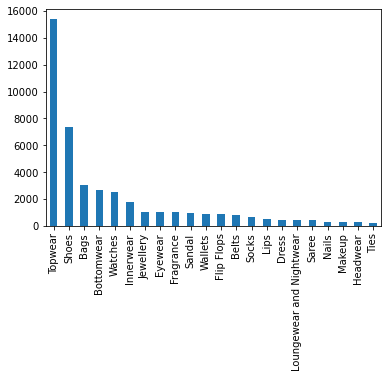

In [22]:
df = df.groupby("subCategory").filter(lambda x: len(x) > 200)
df['subCategory'].value_counts().plot.bar();

In [17]:
classes = df['subCategory'].unique()
print("Number of classes:", len(classes))
print(classes)

Number of classes: 22
['Topwear' 'Bottomwear' 'Watches' 'Socks' 'Shoes' 'Belts' 'Flip Flops'
 'Bags' 'Innerwear' 'Sandal' 'Fragrance' 'Jewellery' 'Lips' 'Saree'
 'Eyewear' 'Nails' 'Dress' 'Loungewear and Nightwear' 'Wallets' 'Headwear'
 'Makeup' 'Ties']


## Train-Test Split (stratified)

In [18]:
y = df['subCategory']
X = df

X_train, X_test, _, _ = train_test_split(X, y,stratify=y, test_size=0.2)

In [19]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

## Save Train & Test annotations

In [20]:
X_train.to_csv("./fashion_dataset/train.csv")

In [21]:
X_test.to_csv("./fashion_dataset/test.csv")